# Step 1: Data Preprocessing

In [26]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from statsmodels.graphics.tsaplots import plot_acf

In [27]:
plt.rcParams.update({"figure.figsize": (15, 6), "figure.dpi": 120}) # matplotlib plot size

PATH_ROOT = Path(os.getcwd()).parent.absolute()
PATH_RAW = os.path.join(PATH_ROOT, "data", "raw_data")
PATH_CLEAN = os.path.join(PATH_ROOT, "data", "clean_data")

In [28]:
def fill_nan_with_mean_from_prev_and_next(df):
    # errors whould occure if there is no previous available value or next available value
        
        count = 0
        NANrows = pd.isnull(df).any(1).to_numpy().nonzero()[0]
        null_df = df.isnull()
        
        for row in NANrows :
            
            for column in range(0, df.shape[1]):

                    prev_av = None # previous_available_value
                    prev_i = 1
                    while pd.isna(prev_av):
                        prev_av = df.iat[row - prev_i, column]
                        prev_i += 1
                    
                    next_av = None # next_available_value
                    next_i = 1
                    while pd.isna(next_av):
                        next_av = df.iat[row + next_i, column]
                        next_i += 1
                        
                    df.iat[row, column] = (float(prev_av) + float(next_av)) / 2

                    #print(df.iat[row, column], prev_av, next_av, (prev_av + next_av) / 2)
                    count += 1 
                    
        print("There are " + str(count) + " Missing values filled.")

        return df

### Germany Electricity Consumption (Electricity)

In [29]:
df1 = pd.read_csv(os.path.join(PATH_RAW, "opsd_germany_daily.csv"), sep = ",")
df1 = df1.iloc[2191:, 1:-1].copy()
df1 = df1.reset_index(drop = True)
print(df1.shape)
df1.head(5)

(2192, 3)


,Consumption,Wind,Solar
0,948.128,227.465,6.587
1,1269.581,207.327,6.574
2,1334.745,473.468,24.679
3,1347.136,499.804,14.681
4,1376.658,523.851,5.071


In [30]:
df1.isnull().values.sum()

5

In [31]:
df1 = fill_nan_with_mean_from_prev_and_next(df1)
df1.isnull().values.sum()

There are 15 Missing values filled.


0

In [32]:
df1.to_csv(os.path.join(PATH_CLEAN, "Electricity.csv"), index = False)

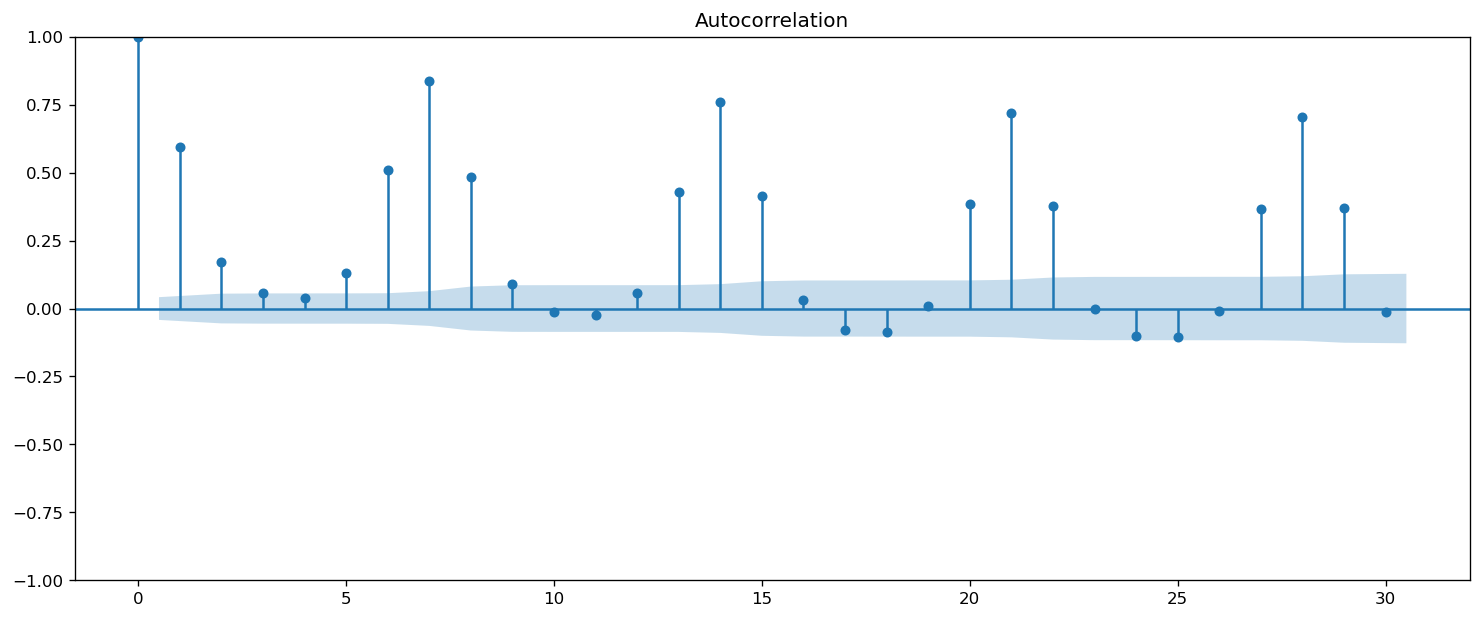

In [38]:
acf_df1 = plot_acf(df1["Consumption"].values, lags=30)

### New Zealand Land Temperatures d02

In [39]:
df2 = pd.read_csv(os.path.join(PATH_RAW, "GlobalLandTemperaturesByCity.csv"), sep = ",")
df2 = df2.loc[df2["Country"] == "New Zealand"]
df2 = df2.reset_index(drop = True)
df2 = df2.iloc[:, :-3]
df2.head(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,City
0,1853-01-01,17.401,1.969,Auckland
1,1853-02-01,17.355,1.806,Auckland
2,1853-03-01,16.740,2.013,Auckland
3,1853-04-01,15.230,1.754,Auckland
4,1853-05-01,13.792,1.440,Auckland


In [40]:
df2 = df2.pivot(index = "dt", columns = "City", values = "AverageTemperature")
df2 = df2.iloc[144:-1,:]
df2

City,Auckland,Christchurch,Dunedin,Hamilton,Lower Hutt,North Shore,Tauranga,Waitakere,Wellington
dt,,,,,,,,,
1853-01-01,17.401,11.954,11.075,17.157,14.789,17.401,16.218,17.401,14.789
1853-02-01,17.355,11.613,10.524,16.905,14.516,17.355,15.869,17.355,14.516
1853-03-01,16.740,10.519,8.526,15.640,13.542,16.740,14.897,16.740,13.542
1853-04-01,15.230,9.248,6.036,13.423,12.088,15.230,13.170,15.230,12.088
1853-05-01,13.792,7.627,3.035,11.307,10.593,13.792,11.580,13.792,10.593
...,...,...,...,...,...,...,...,...,...
2013-04-01,17.839,11.941,8.543,16.224,15.112,17.839,16.037,17.839,15.112
2013-05-01,15.278,9.501,5.216,12.771,12.102,15.278,13.028,15.278,12.102
2013-06-01,13.450,7.129,1.919,10.517,10.164,13.450,11.150,13.450,10.164


In [41]:
df2.isnull().values.sum()

0

In [42]:
df2.to_csv(os.path.join(PATH_CLEAN, "NZTemp.csv"), index = False)

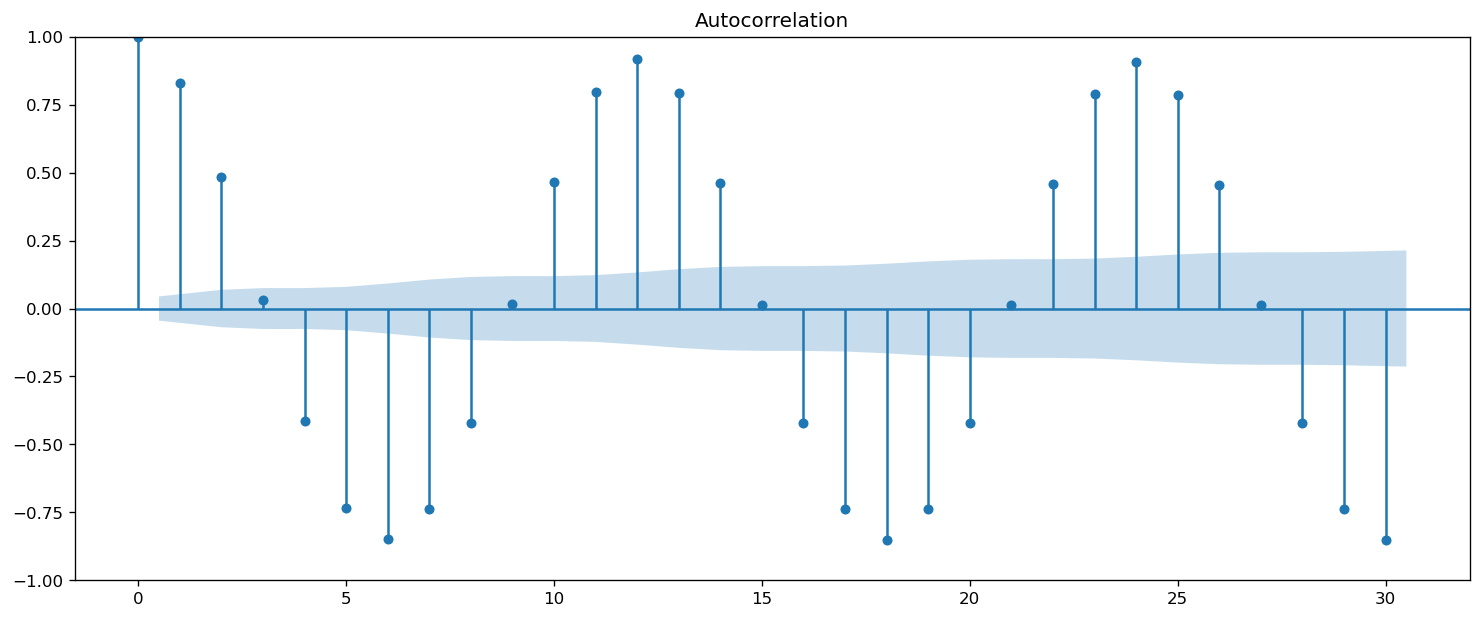

In [43]:
acf_df2 = plot_acf(df2["Auckland"].values, lags=30)

## Yahoo Finance
### CNY USD Exchange Rate d03

In [44]:
import yfinance as yf

In [45]:
df3 = yf.download("CNY=X", start="2011-01-01", end="2022-01-01")
df3.isnull().values.sum()

[*********************100%***********************]  1 of 1 completed


0

In [46]:
df3 = df3.iloc[:,:-1] # Exclude Volume
df3.to_csv(os.path.join(PATH_CLEAN, "CNYExch.csv"), index = False)
df3

,Open,High,Low,Close,Adj Close
Date,,,,,
2010-12-31,6.5952,6.5952,6.5916,6.6124,6.6124
2011-01-03,6.5800,6.5800,6.5800,6.5916,6.5916
2011-01-04,6.5988,6.6000,6.5970,6.5800,6.5800
2011-01-05,6.6112,6.6112,6.5775,6.5970,6.5970
2011-01-06,6.6134,6.6165,6.6134,6.5775,6.5775
...,...,...,...,...,...
2021-12-27,6.3666,6.3722,6.3613,6.3666,6.3666
2021-12-28,6.3698,6.3715,6.3608,6.3698,6.3698
2021-12-29,6.3672,6.3714,6.3584,6.3672,6.3672


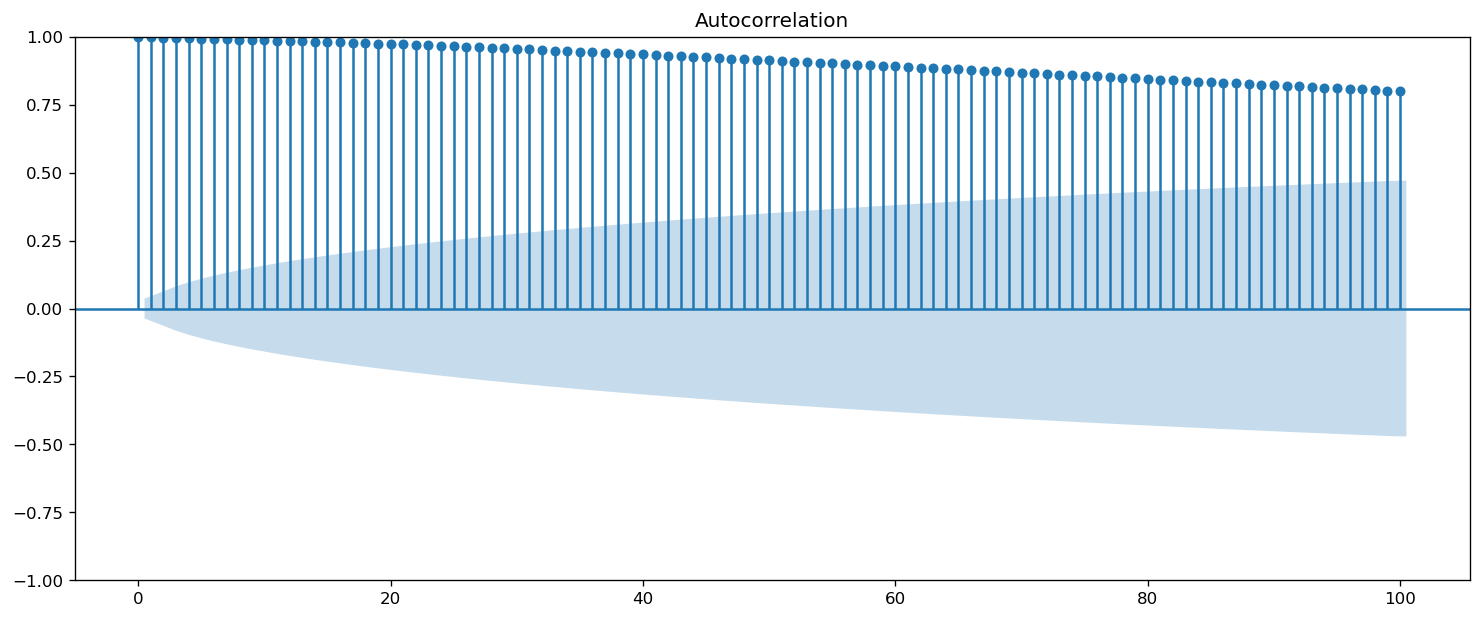

In [48]:
acf_df3 = plot_acf(df3["Close"].values, lags=100)

### Oil d04

In [49]:
df4 = yf.download("OIL", start="2011-01-01", end="2022-01-01")
df4.isnull().values.sum()

[*********************100%***********************]  1 of 1 completed


0

In [50]:
df4.to_csv(os.path.join(PATH_CLEAN, "Oil.csv"), index = False)
df4

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-04-21,49.939999,50.349998,49.900002,50.349998,50.349998,10500
2011-04-25,50.570000,50.570000,49.910000,50.049999,50.049999,14900
2011-04-26,50.180000,50.430000,50.099998,50.299999,50.299999,15000
2011-04-27,50.349998,50.849998,49.799999,50.810001,50.810001,35200
2011-04-28,50.779999,51.160000,50.169998,50.700001,50.700001,44800
...,...,...,...,...,...,...
2021-12-23,22.610001,22.980000,22.590000,22.950001,22.950001,46800
2021-12-27,22.870001,23.549999,22.820000,23.549999,23.549999,32400
2021-12-28,23.680000,23.760000,23.520000,23.540001,23.540001,93400


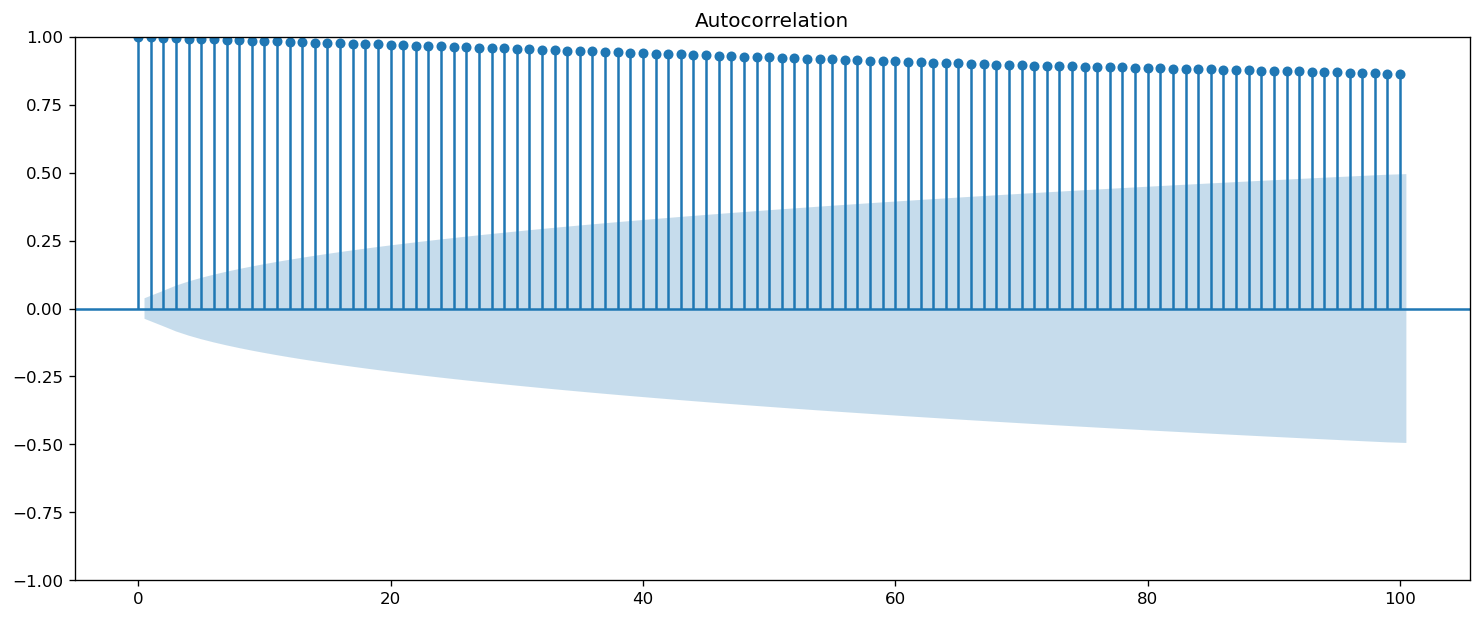

In [51]:
acf_df4 = plot_acf(df4["Close"].values, lags=100)

### Global Hosehold Power Consumption "d01"

In [54]:
df5 = pd.read_csv(os.path.join(PATH_RAW, "household_power_consumption.txt"), sep = ";", na_values = "?")


In [51]:
df5

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


In [55]:
df5 = df5[df5["Time"].isin(["00:00:00", "12:00:00"])]
df5 = df5.reset_index(drop = True)
df5 = df5.iloc[:, 2:]
df5.isnull().values.sum()

238

In [56]:
df5 = fill_nan_with_mean_from_prev_and_next(df5)
df5.isnull().values.sum()

There are 238 Missing values filled.


0

In [57]:
df5

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,1.044,0.152,242.73,4.4,0.0,2.0,0.0
1,1.962,0.252,239.73,8.2,0.0,0.0,18.0
2,0.278,0.126,246.17,1.2,0.0,2.0,0.0
3,1.734,0.084,242.96,7.0,0.0,0.0,19.0
4,0.414,0.242,241.19,2.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
2877,1.386,0.058,240.91,5.6,0.0,1.0,18.0
2878,0.406,0.188,240.33,1.8,0.0,1.0,0.0
2879,0.420,0.184,241.08,1.8,0.0,1.0,0.0
2880,0.398,0.192,242.73,1.8,0.0,1.0,0.0


In [ ]:
df5.to_csv(os.path.join(PATH_CLEAN, "Power.csv"), index = False)